<a href="https://colab.research.google.com/github/ppmcool/Habberman_EDA/blob/main/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

To predict whether patient will survive more than 5 years or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_haberman=pd.read_csv("/content/haberman.csv",names=["Age","Year","Axilliary_Nodes","Survival_status"])

In [3]:
df_haberman.head(10)

,Age,Year,Axilliary_Nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
df_haberman.shape

(306, 4)

In [5]:
df_haberman['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

**Observations**

Seems to be an Imbalanced Dataset with a ratio of 1:3

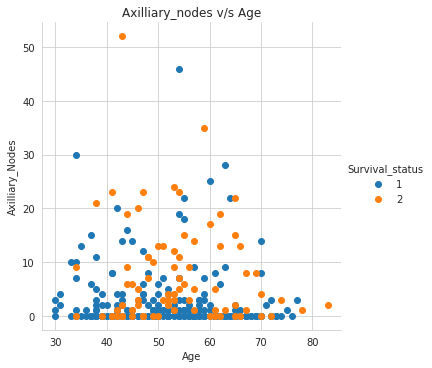

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(df_haberman,hue="Survival_status",size =5)\
    .map(plt.scatter,"Age","Axilliary_Nodes").add_legend().set(title="Axilliary_nodes v/s Age")
plt.show()

**Observations**

It can be seen that Survival_staus class is not linearly seperable , both classes seems to be overlapping.

But we can also say that when age is between 30-40 and auxilliary nodes<10 then survival chances are more.




```

```



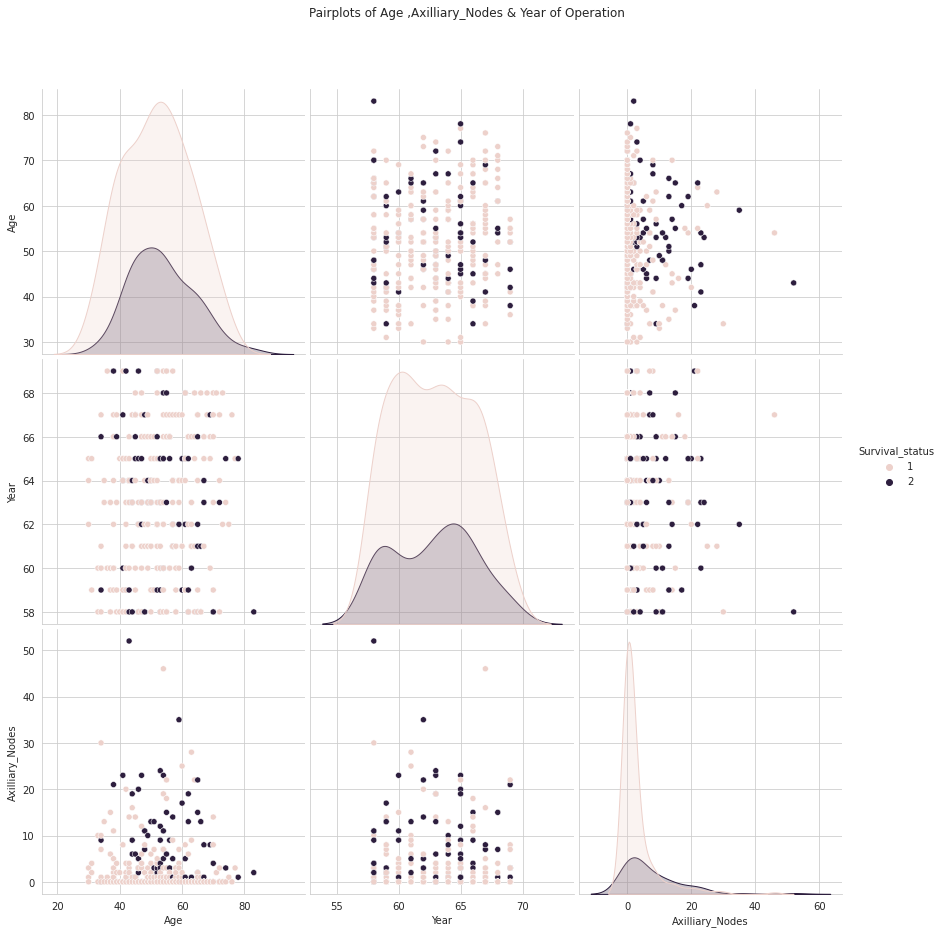

In [16]:
sns.set_style("whitegrid");
g=sns.pairplot(df_haberman, hue="Survival_status", size=4);
g.fig.suptitle("Pairplots of Age ,Axilliary_Nodes & Year of Operation", y=1.08)  #https://www.tutorialspoint.com/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid-matplotlib
plt.show()

**Observations**

Plots 2,3,6 and 4,7,8 are same plots we can consider any of them.
Plot 1,5,9 are kind of histogram as both axes has same feature , they are of no use in bivariate analysis.

Plot 3-Age and Auxilliary_nodes seems to be an important feature , as it shows that when Auxilliary_nodes are between 0-10 approx , the chances of survival are more.

Plot 2,6 - The plot of Operation_Year and Age , Auxilliary_Nodes and Year doesn't provide any useful information, as both the plots are heavily overlapping.

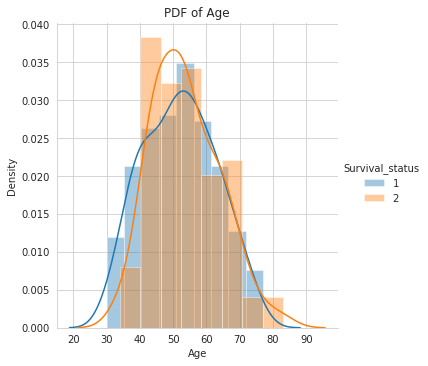

In [47]:
sns.FacetGrid(df_haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend().set(title="PDF of Age");
plt.show();

**Observations**:

1.Patients with Age 30-40 has higher chances of survival.

2.Patients age between 40 and 70 have same chances of survival and death.

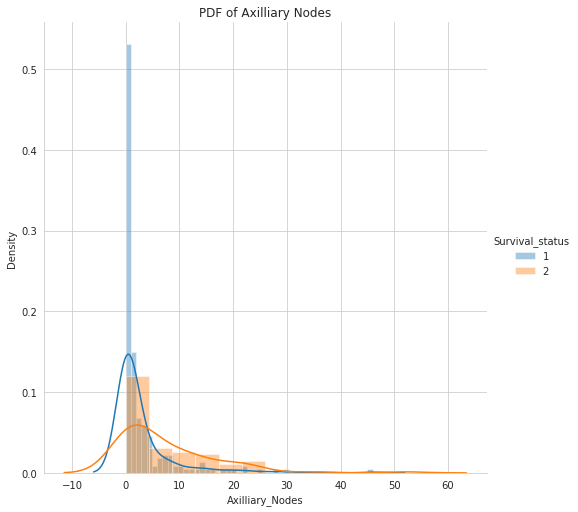

In [21]:
sns.FacetGrid(df_haberman, hue="Survival_status", size=7) \
   .map(sns.distplot, "Axilliary_Nodes") \
   .add_legend().set(title="PDF of Axilliary Nodes");
plt.show();

**Observations**

1.When Axilliary node is 0 , the patient has high survival chances of more than 5 years.

2.when nodes are less than 4 , the patient can survive more than 5 years.

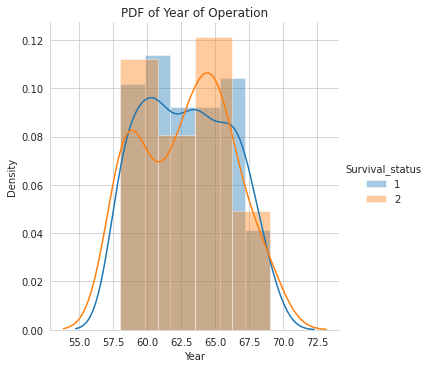

In [23]:
sns.FacetGrid(df_haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Year") \
   .add_legend().set(title="PDF of Year of Operation");
plt.show();

**Observation** :

Operation year between 60 and 62 the survival chances are higher.

In [25]:
survival_more_than_5 = df_haberman[df_haberman["Survival_status"] == 1]
survival_less_than_5 = df_haberman[df_haberman["Survival_status"] == 2]

[0.91555556 0.04888889 0.02222222 0.00888889 0.00444444]
[ 0.   9.2 18.4 27.6 36.8 46. ]


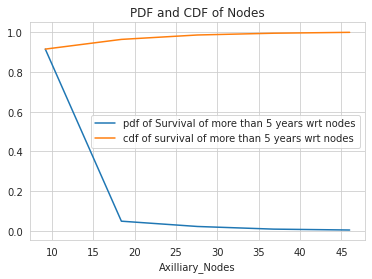

In [46]:
counts, bin_edges = np.histogram(survival_more_than_5['Axilliary_Nodes'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['pdf of Survival of more than 5 years wrt nodes','cdf of survival of more than 5 years wrt nodes'])
plt.xlabel('Axilliary_Nodes')
plt.title("PDF and CDF of Nodes")

plt.show();

**Observations**:

1.80-83 %  of people has survived for more than 5 years when nodes are less than 3 approx.



[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


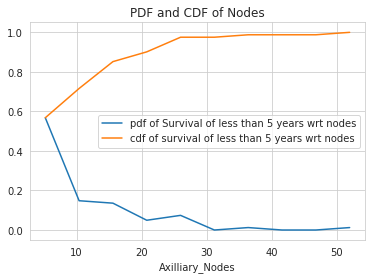

In [45]:
counts, bin_edges = np.histogram(survival_less_than_5['Axilliary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['pdf of Survival of less than 5 years wrt nodes','cdf of survival of less than 5 years wrt nodes'])
plt.xlabel('Axilliary_Nodes')
plt.title("PDF and CDF of Nodes")

plt.show()

Observation:

There are more than 80% chances of less survival rate having nodes greater than 10.

[0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
[34.  43.8 53.6 63.4 73.2 83. ]


Text(0.5, 1.0, 'PDF and CDF of Age')

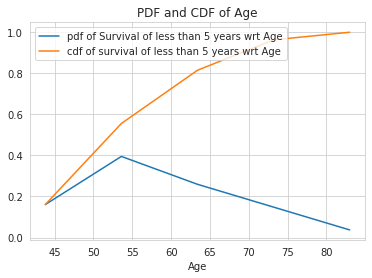

In [44]:
counts, bin_edges = np.histogram(survival_less_than_5['Age'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['pdf of Survival of less than 5 years wrt Age','cdf of survival of less than 5 years wrt Age'])
plt.xlabel('Age')
plt.title("PDF and CDF of Age")


Observations:
There are more than 80% of chances of less survival than 5 years , if Age is greater than 65

[0.16       0.21777778 0.32888889 0.20444444 0.08888889]
[30.  39.4 48.8 58.2 67.6 77. ]


Text(0.5, 1.0, 'PDF and CDF of Age')

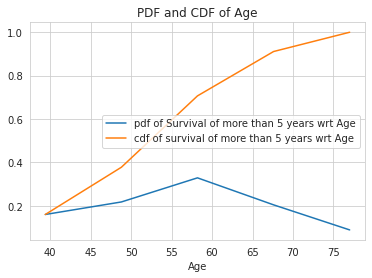

In [43]:
counts, bin_edges = np.histogram(survival_more_than_5['Age'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['pdf of Survival of more than 5 years wrt Age','cdf of survival of more than 5 years wrt Age'])
plt.xlabel('Age')
plt.title("PDF and CDF of Age")


Observation:
There is a 80% chance of survival of more than 5 years if age>63

We can conclude that Age doesn't have any hige impact on survival rate as compared to Axilliary nodes has.

In [ ]:
print("Mean of number of nodes for people who survived 5+ years is: ",np.mean(survival_more_than_5["Axilliary_Nodes"]))
print("SD of number of nodes for people who survived 5+ years is: ",np.std(survival_more_than_5["Axilliary_Nodes"]))
print("\nMean of number of nodes for people who survived <5 years is: ",np.mean(survival_less_than_5["Axilliary_Nodes"]))
print("SD of number of nodes for people who survived <5 years is: ",np.std(survival_less_than_5["Axilliary_Nodes"]))

Mean of number of nodes for people who survived 5+ years is:  2.7911111111111113
SD of number of nodes for people who survived 5+ years is:  5.857258449412131

Mean of number of nodes for people who survived <5 years is:  7.45679012345679
SD of number of nodes for people who survived <5 years is:  9.128776076761632


40% of patients have survived with age equal to 50

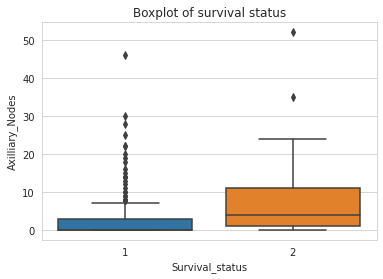

In [41]:
sns.boxplot(x='Survival_status',y='Axilliary_Nodes', data=df_haberman)
plt.title("Boxplot of survival status")
plt.show()

1.75th percentile of survival more than 5 years is nearly equal to 25% of survival less than 5 years.

2.Median Axilliary_nodes for survived patients more than 5 years is 0.

3.There are many outliers in Survival more than 5 years class.

4.The median of survival_less_than_5 class is nearly equal to 75th percentile of survival_more_than_5 class.

5.The survival_less_than_5 distribution is right skewed.

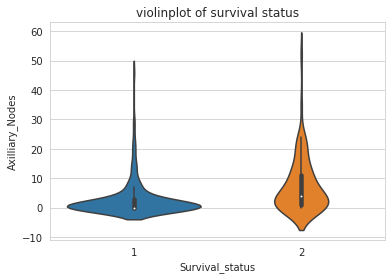

In [42]:
sns.violinplot(x="Survival_status", y="Axilliary_Nodes", data=df_haberman, size=8)
plt.title("violinplot of survival status")

plt.show()

Observation

The spread of data in survival_more_than_5 seems to be more near 0 and for survival_less_than_5 it is more near 2-3 nodes.

The distribution of axilliary nodes in both plot are not normally distributed , there is clearly a skewness visible.

**Conclusion**:

1.Axilliary_nodes and survival status are highly correlated.

2.There is a slight or lesser correlation between survival status and Age and no correlation with year of Operation.

3.Patients with lesser number of nodes tends to survive more .

4.When number of nodes increases the chances of survival seems to be decreasing.

5.if we set a threshold of less than 5 nodes , there of chances of nearly 85% of survival.